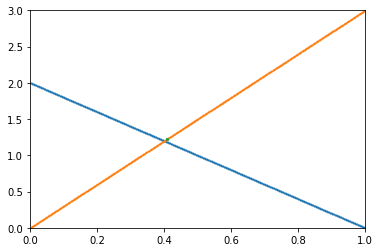

In [5]:
import numpy as np
from matplotlib.pyplot import *
from IPython.display import *
from matplotlib.patches import *
from time import sleep

def D(x,slope=-2,intercept=2):
    if type(x)==float:
        return slope*x+intercept 
    if x.dtype==np.dtype('float64'):
        return slope*x+intercept 
def S(x,slope=3,intercept=0):
    if type(x)==float:
        return slope*x+intercept 
    if x.dtype==np.dtype('float64'):
        return slope*x+intercept 

def draw_traj(X,Dcurve,Scurve,x,t):
    clf()
    scatter(X,Dcurve,s=0.25)
    scatter(X,Scurve,s=0.25)        
    scatter(x,t,s=5)
    xlim(0,1)
    ylim(0,3)
    show()
    display(gcf())
    clear_output(wait=True)


def cobweb(x0=0.8,y0=2.4,X = np.linspace(0,1,1000),num_iter=5):
    x,y=x0,y0
    Dcurve = D(X)
    Scurve = S(X)
    for iteration in range(num_iter):
        x_c = X[np.argmin(np.abs(x-X))]# corrected x
        x,y=x_c,S(x_c)
        if y==S(x) and S(x)>D(x):
            downward = np.linspace(S(x),D(x),10)
            for py in downward:
                draw_traj(X,Dcurve,Scurve,x,py)
        x,y = x,D(x) 
        
        if y==D(x) and S(x)>D(x):
            x_end = X[np.argmin(np.abs(Scurve-D(x)))]
            leftward = np.linspace(x,x_end,10)
            for px in leftward:
                draw_traj(X,Dcurve,Scurve,px,y)
        x,y = x_end, S(x_end)
        
        if y==S(x) and S(x)<D(x):
            upward = np.linspace(S(x),D(x),10)
            for py in upward:
                draw_traj(X,Dcurve,Scurve,x,py)
        x,y = x,D(x)
        
        if y==D(x) and S(x)<D(x):
            x_end = X[np.argmin(np.abs(Scurve-D(x)))]
            rightward = np.linspace(x,x_end,10)
            for px in rightward:
                draw_traj(X,Dcurve,Scurve,px,y)
        x,y = x_end,S(x)

cbw=cobweb()      

    
        


